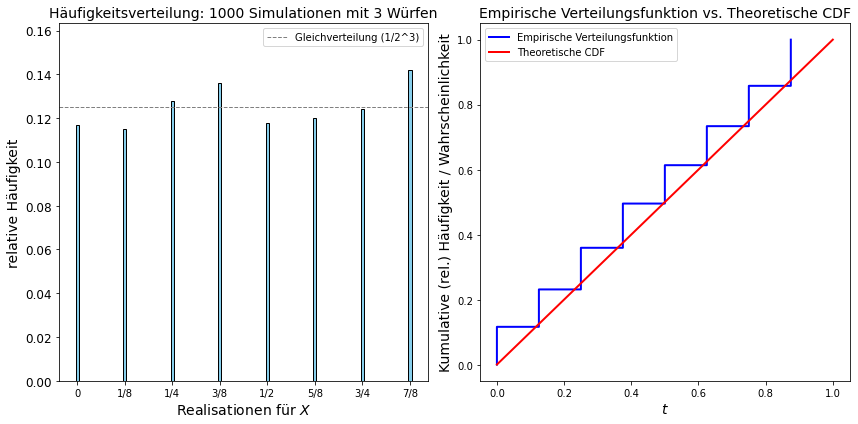

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

def simulate_sequence_values(num_flips, probability, num_trials):
    """
    Simuliert mehrere Sequenzen von Münzwürfen und berechnet die Werte der Sequenzen.
    
    Args:
    - num_flips: Anzahl der Würfe pro Sequenz.
    - probability: Wahrscheinlichkeit für einen Treffer (z.B. 0.5 für eine faire Münze).
    - num_trials: Anzahl der zu simulierenden Sequenzen.
    
    Returns:
    - Array der berechneten Werte für jede Sequenz.
    """
    # Simuliere die Treffer (1) und Nicht-Treffer (0) für jede Sequenz
    flips = np.random.binomial(1, probability, (num_trials, num_flips))
    
    # Berechne den Wert jeder Sequenz
    values = np.sum(flips * (1 / 2) ** np.arange(1, num_flips + 1), axis=1)
    return values

def plot_sequence_value_distribution_and_ecdf(num_flips, probability, num_trials, save_as_png=False, figsize=(10, 6)):
    """
    Plottet sowohl die Häufigkeitsverteilung (Histogramm) als auch die empirische Verteilungsfunktion (ECDF).
    
    Args:
    - num_flips: Anzahl der Würfe pro Sequenz.
    - probability: Wahrscheinlichkeit für einen Treffer.
    - num_trials: Anzahl der zu simulierenden Sequenzen.
    - save_as_png: Bool, ob das Bild als PNG gespeichert werden soll.
    - figsize: Größe des Bildes im Format (Breite, Höhe).
    """
    # Simuliere die Werte der Sequenzen
    sequence_values = simulate_sequence_values(num_flips, probability, num_trials)
    
    # Berechne die einzigartigen Werte und ihre Häufigkeiten
    unique_values, counts = np.unique(sequence_values, return_counts=True)
    relative_frequencies = counts / num_trials  # Umrechnung in relative Häufigkeiten
    
    # Berechne den Wert der Gleichverteilung
    uniform_value = 1 / (2 ** num_flips)
    
    # Erstelle das Histogramm für die diskreten Werte
    plt.figure(figsize=figsize)
    
    # 1. Häufigkeitsdiagramm (Histogramm)
    plt.subplot(1, 2, 1)  # Erster Plot für das Histogramm
    plt.bar(unique_values, relative_frequencies, width=0.008,
            color='skyblue', edgecolor='black')
    plt.axhline(y=uniform_value, color='gray', linestyle='--',
                linewidth=1, label=f"Gleichverteilung (1/2^{num_flips})")
    plt.xlabel("Realisationen für $X$", fontsize=14)
    plt.ylabel("relative Häufigkeit", fontsize=14)
    plt.title(f"Häufigkeitsverteilung: {num_trials} Simulationen mit {num_flips} Würfen", fontsize=14)
    plt.yticks(fontsize=12)
    max_relative_frequency = max(relative_frequencies)
    plt.ylim(ymax=1.15 * max_relative_frequency)  
    # Bruchdarstellung auf der x-Achse für n < 5, Dezimalwerte für n > 5
    if num_flips < 5:
        x_labels = [Fraction(value).limit_denominator() for value in unique_values]
        plt.xticks(unique_values, [str(f) for f in x_labels])  # Anzeige der Brüche als Strings
    else:
        plt.xticks(np.linspace(0, 1, 11), fontsize=14)
    
    plt.legend()
    
    # 2. Empirische Verteilungsfunktion (ECDF)
    plt.subplot(1, 2, 2)  # Zweiter Plot für die ECDF
    
    # Berechnung der ECDF
    sorted_values = np.sort(sequence_values)
    ecdf = np.arange(1, num_trials + 1) / num_trials
    # ECDF plotten (Treppenfunktion)
    plt.step(sorted_values, ecdf, where='post', color='blue',
             label="Empirische Verteilungsfunktion", linewidth=2)
   
    # Achsen und Titel für ECDF
    plt.xlabel("$t$", fontsize=14)
    plt.ylabel("Kumulative (rel.) Häufigkeit / Wahrscheinlichkeit", fontsize=14)
    plt.title(f"Empirische Verteilungsfunktion vs. Theoretische CDF", fontsize=14)
    
    # Theoretische CDF der Normalverteilung
    x_vals = np.linspace(0, 1, 1000)
    theoretical_cdf = np.cumsum(np.ones_like(x_vals)) / len(x_vals)
    plt.plot(x_vals, theoretical_cdf, 'r-', label="Theoretische CDF", linewidth=2)
    plt.legend()
    
    # Bild speichern, falls gewünscht
    if save_as_png:
        plt.savefig("Simulation_und_ECDF.png", format="png", dpi=300)
    
    # Anzeige der beiden Plots
    plt.tight_layout()
    plt.show()

# Parameter für die Simulation
num_flips = 3          # Anzahl der Würfe pro Spiel
probability = 0.5      # Wahrscheinlichkeit für einen Treffer (Kopf)
num_trials = 1000     # Anzahl der Simulationen
save_as_png = True     # Speichert das Diagramm als PNG
figsize = (12, 6)      # Größe des Bildes (Breite, Höhe)

# Simulation ausführen und Verteilung der Werte plotten
plot_sequence_value_distribution_and_ecdf(num_flips, probability, 
                                          num_trials, save_as_png=save_as_png, figsize=figsize)